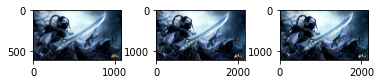

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('nitianerxing.jpg')
img = img[:,:,::-1]
plt.subplots_adjust(hspace=0.4,wspace=0.4)
#调整了输出图像之间的距离
plt.subplot(131)
plt.imshow(img)
res1 = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
#参数二是输出图像的路径，参数三是水平方向上的缩放因子，参数四是垂直方向上的
#参数五是插值法
plt.subplot(132)
plt.imshow(res1)
height, width = img.shape[:2]
res2 = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
plt.subplot(133)
plt.imshow(res2)
#很明显我们可以通过坐标轴的标度看出图像的尺寸被修改了

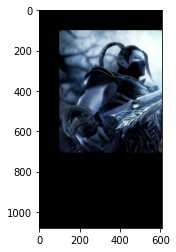

In [15]:
rows,cols,channel = img.shape
M = np.float32([[1,0,100],[0,1,100]])
#治理就是将x和y不变(乘1)，在x和y上分别增加偏移量(100和100)
#这里其实就是矩阵乘法，仅仅是图片内部数组比较复杂而已
dst = cv2.warpAffine(img,M,(rows,cols))
#参数二就是变换矩阵，参数三是输出图片的尺寸
plt.imshow(dst)

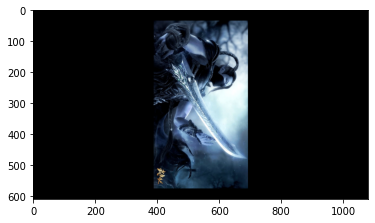

In [16]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),-90,0.5)
#参数一是原图像的旋转中心，参数二是旋转角度，参数三是各向同性缩放因子
dst = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(dst)

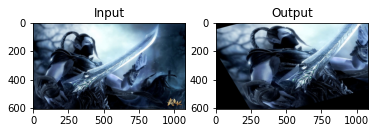

In [17]:
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
#仿射变换
#分别选取三个点，将三个点位置变换后但是图像内部相对位置不变的图像展示
dst = cv2.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

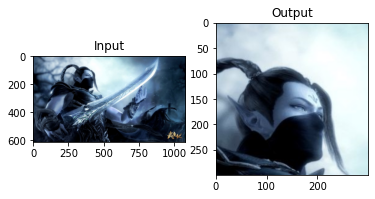

In [18]:
pts1 = np.float32([[250,0],[500,0],[250,250],[500,250]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
#透视变换，和上面类似
dst = cv2.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

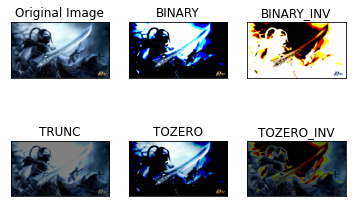

In [19]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
#参数二是阈值，参数三是所使用的的像素最大值，参数四是阈值类型
#上面操作均是设置阈值，
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

这是官方关于参数四阈值类型的数学描述：
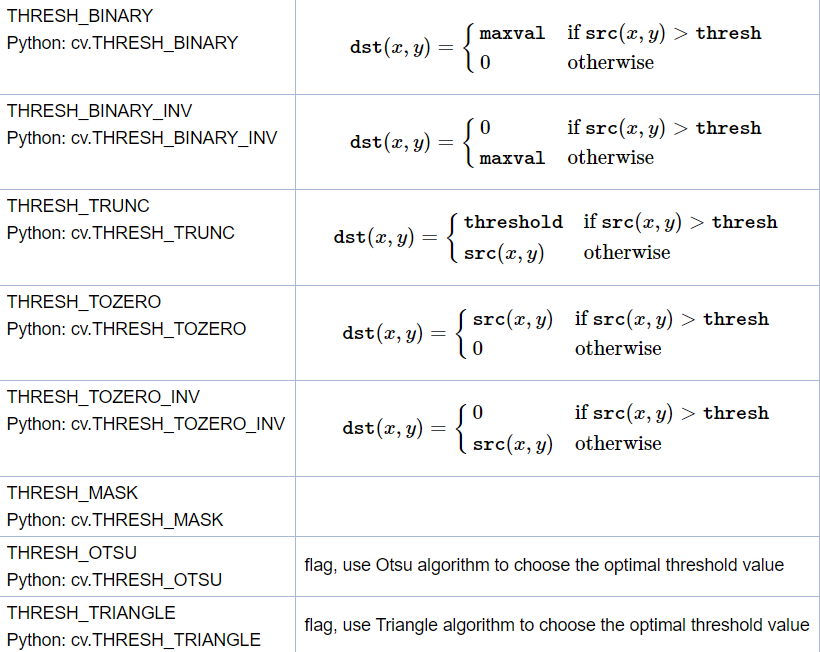

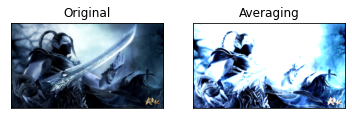

In [20]:
kernel = np.random.random((3,3))
dst = cv2.filter2D(img,-1,kernel)
#滑动内核，对像素值卷积，类似于深度学习上的卷积操作
#也和信号与系统上的卷积操作类似，不过这个更形象些
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

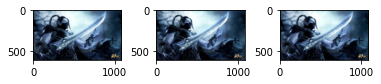

In [21]:
blur = cv2.GaussianBlur(img,(5,5),0)
#用法相同，只是高斯滤波的核不同，因而效果不同
median = cv2.medianBlur(img,5)
#中值滤波也是
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(blur)
plt.subplot(133)
plt.imshow(median)

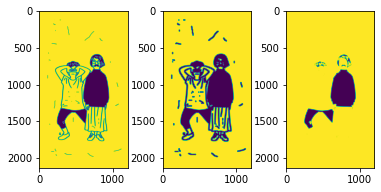

In [26]:
img = cv2.imread('smallpeople.jpg',0)
kernel = np.ones((5,5),np.uint8)*100
erosion = cv2.erode(img,kernel,iterations = 3)
#这是腐蚀，很明显我们可以看出小人的边框线条加重了
#参数三是腐蚀次数
dilation = cv2.dilate(img,kernel,iterations = 3)
#这是膨胀，明显我们可以看出小人的边框线条减弱了
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.subplot(131)
plt.imshow(img)
plt.subplot(132)
plt.imshow(erosion)
plt.subplot(133)
plt.imshow(dilation)

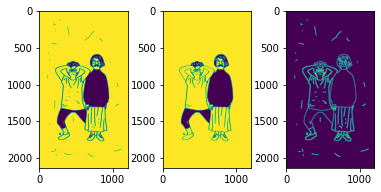

In [28]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
#开运算是先腐蚀后膨胀，闭运算相反
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
#开运算消除主体外部噪声。闭运算消除内部
#可能我的选图不好，只有第二副效果明显(男孩的衣服)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
#得到物体轮廓
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.subplot(131)
plt.imshow(opening)
plt.subplot(132)
plt.imshow(closing)
plt.subplot(133)
plt.imshow(gradient)

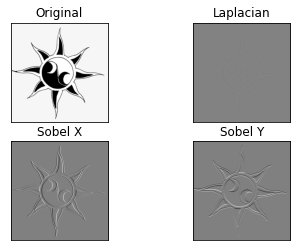

In [29]:
img = cv2.imread('sunmoon.jpg',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

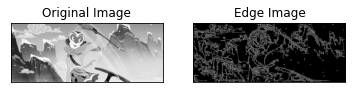

In [42]:
img = cv2.imread('sunwukong.jpg',0)
edges = cv2.Canny(img,10,100)
#这是边缘检测，参数二三均是阈值
#大于三的是边，小于二的不是边，位于这两个阈值之间的是基于连通性的边或非边
#如果它们连接到“确定边缘”像素，则它们被视为边缘的一部分
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

不好意思，跳过了 Countours 部分，没弄懂

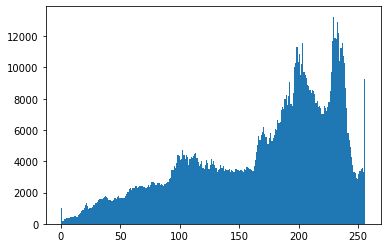

In [43]:
img = cv2.imread('sunwukong.jpg')
plt.hist(img.ravel(),256,[0,256])
#绘制像素值分布直方图
plt.show()

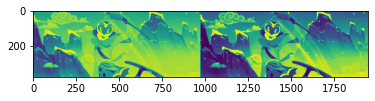

In [47]:
img = cv2.imread('sunwukong.jpg',0)
equ = cv2.equalizeHist(img)
#直方图均衡化，使像素尽可能分布均匀，提高图像对比度
res = np.hstack((img,equ)) 
#将图像数组水平堆在一起
plt.imshow(res)

我不知道傅里叶变换、模板匹配、霍夫线变换、霍夫圆变换有什么用，所以就跳过了

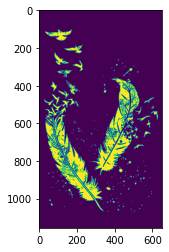

In [49]:
img = cv2.imread('yvmao.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#图像的语义分割
plt.imshow(thresh)

还有一个提取前景我也没弄懂